## **1.1 Introducción**

---

 Todas las bases están en formato CSV y se pueden acceder a través de Github.

> **Bases de datos:**

1.   Ventas de una red de tiendas por departamentos que opera en toda la Argentina.

2.   Distribución de volúmenes y medidas de productos de una empresa de artículos de limpieza.

 2.1 Volumen de un suavizante de 1 litro en un total de 1000 muestras medidas.

 2.2 Medidas de altura, longitud y ancho de una caja de detergente en polvo en un total de 1000 muestras medidas.

revisaremos una de las bases de datos y elaboraremos nuestros análisis de acuerdo con las preguntas que se planteen, tratando de responderlas mediante el uso de recursos visuales (gráficos y elementos visuales).

In [ ]:
%pip install notebook

%pip install pandas matplotlib seaborn numpy plotly

In [1]:
# Paletas de colores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
GRIS1, GRIS2, GRIS3, GRIS4, GRIS5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
ROJO1, ANARANJADO1, AMARILLO1, VERDE1, VERDE2, VERDE3 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f', '#264653'

### **Situación problema 1**
Una red de tiendas por departamentos que opera en toda la Argentina desea saber cómo están comportándose las provincias o su clientela en las ventas de sus productos. Para lograrlo, como científico de datos, necesitarás analizar los datos que ella ha proporcionado en un conjunto de datos con los pedidos de sus clientes entre los años 2016 y 2019.

Aquí, trabajaremos con una cantidad menor de datos, pero el enfoque es el mismo para conjuntos de datos más grandes.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [ ]:
url = 'https://raw.githubusercontent.com/C-Adrian-ST95/Ventas_Tiendas_Visualizacion_2016_2019/refs/heads/master/ventas.csv' # data de venta
ventas = pd.read_csv(url, sep= '#')
ventas.head()

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,provincia,region,departamento,tipo_producto,precio_base,precio_unit_sin_descuento,descuento,precio_unit_venta,cantidad,ventas,ganancia
0,2018-11-09,2018-11-12,Económica,Gaspar Fernández,B2C,Lomas de Zamora,Buenos Aires,Buenos Aires,Materiales de construcción,Fontanería,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Económica,Gaspar Fernández,B2C,Lomas de Zamora,Buenos Aires,Buenos Aires,Materiales de construcción,Herramientas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Económica,Matías González,B2B,Córdoba,Córdoba,Central,Jardinería y paisajismo,Semillas,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega estándar,Lucas González,B2C,Gualeguay,Entre Ríos,Litoral,Materiales de construcción,Materiales de revestimiento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega estándar,Lucas González,B2C,Gualeguay,Entre Ríos,Litoral,Jardinería y paisajismo,Macetas,35.88,42.24,0.100,38.02,2,76.04,4.28


**`información de la Data`**

In [4]:
ventas.info() #informacion de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fecha_pedido               8940 non-null   object 
 1   fecha_envio                8940 non-null   object 
 2   modo_envio                 8940 non-null   object 
 3   nombre_cliente             8940 non-null   object 
 4   segmento_cliente           8940 non-null   object 
 5   ciudad                     8940 non-null   object 
 6   provincia                  8940 non-null   object 
 7   region                     8940 non-null   object 
 8   departamento               8940 non-null   object 
 9   tipo_producto              8940 non-null   object 
 10  precio_base                8940 non-null   float64
 11  precio_unit_sin_descuento  8940 non-null   float64
 12  descuento                  8940 non-null   float64
 13  precio_unit_venta          8940 non-null   float

In [5]:
# Tranformación de datos de la Fecha, de object a time.
ventas['fecha_envio'] = pd.to_datetime(ventas['fecha_envio'], format='%Y-%m-%d')
ventas['fecha_pedido'] = pd.to_datetime(ventas['fecha_pedido'], format='%Y-%m-%d')
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   fecha_pedido               8940 non-null   datetime64[ns]
 1   fecha_envio                8940 non-null   datetime64[ns]
 2   modo_envio                 8940 non-null   object        
 3   nombre_cliente             8940 non-null   object        
 4   segmento_cliente           8940 non-null   object        
 5   ciudad                     8940 non-null   object        
 6   provincia                  8940 non-null   object        
 7   region                     8940 non-null   object        
 8   departamento               8940 non-null   object        
 9   tipo_producto              8940 non-null   object        
 10  precio_base                8940 non-null   float64       
 11  precio_unit_sin_descuento  8940 non-null   float64       
 12  descue

 vamos a proceder con los análisis que podemos realizar con estos datos y qué gráficos de comparación vamos a utilizar para presentar este tipo de información.

Preguntas:
1. ¿Cuál es el total de ventas por año? ¿Y qué año tuvo un mejor desempeño en nuestra base de datos?

2. ¿Cuáles son los 7 productos que generaron más beneficios en nuestro catálogo durante el periodo representado?

3. Si dividimos el total de ventas por año por regiones, ¿qué podemos observar en nuestros datos?

4. ¿Cuál es el método de envío más utilizado por los clientes de la tienda? ¿Es proporcional para B2B y B2C?

5. ¿Cuál es el total de ventas por trimestre en la provincia de Buenos Aires?

6. ¿Cuál es la facturación por trimestre en cada región?

### **Pregunta 1 -** 1. ¿Cuál es el total de ventas por año? ¿Y qué año tuvo un mejor desempeño en nuestra base de datos?

#### Tratando los datos para generar la visualización

In [6]:
df_ventas_ano = ventas.copy()  # copia de datos, para conservar la data original
# Seleccionamos la columnas necesarias
df_ventas_ano = df_ventas_ano[['fecha_pedido','ventas']]
df_ventas_ano['ano'] = df_ventas_ano['fecha_pedido'].dt.year #incluimos un columna por años
df_ventas_ano.drop(labels= 'fecha_pedido', axis = 1, inplace=True) #eliminamos la columnas fecha pedido
df_ventas_ano = df_ventas_ano.groupby(['ano']).aggregate('sum')#Agrupación por año depedidos
df_ventas_ano.head()

,ventas
ano,
2016,1402652.33
2017,1489179.52
2018,1884161.41
2019,2305006.29


#### Generando el gráfico

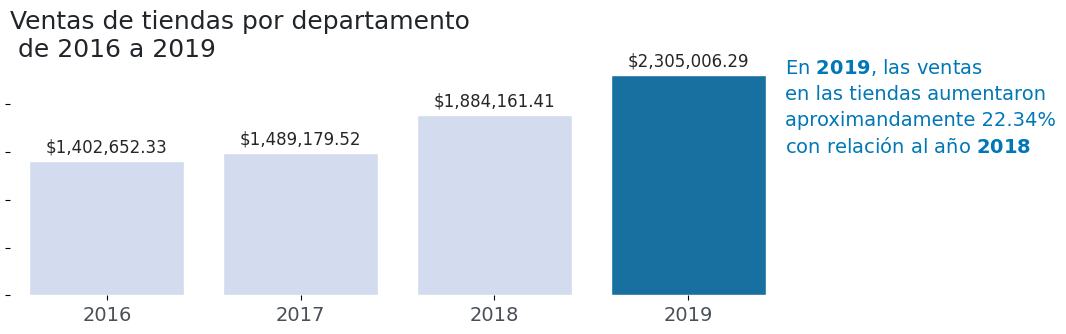

In [8]:
#Selecionar las Barras por colores
colors = []
for anos in df_ventas_ano.index:
  if df_ventas_ano.loc[anos, 'ventas'] == df_ventas_ano['ventas'].max():
    colors.append(AZUL2) # Color resaltado para el mayor valor
  else:
    colors.append(AZUL5) # Color estándar para el resto

# Usaremos una función
def grafico_columnas(colores: list = colors):

  # Creamos la figura y el eje con un tamaño personalizado
  fig, ax = plt.subplots(figsize =(10,3))
  # Establecemos un estilo blanco limpio
  sns.set_theme(style='white')

  ax = sns.barplot(data=df_ventas_ano,
                   x=df_ventas_ano.index,
                   y='ventas', palette=colores,
                   hue=df_ventas_ano.index, # hue para aplicar color individual
                   legend=False  # Ocultamos la leyenda
                    )

  # Título y configuración estética del gráfico
  ax.set_title('Ventas de tiendas por departamento\n de 2016 a 2019', loc = 'left', fontsize= 18, color= GRIS1)
  ax.set_xlabel('')             # Quitamos etiqueta del eje X
  ax.set_ylabel('')             # Quitamos etiqueta del eje Y
  ax.set_yticklabels([])        # Ocultamos números en eje Y
  ax.xaxis.set_tick_params(labelsize = 14, labelcolor = GRIS2)
  # Quitamos bordes (espinas) de los ejes
  sns.despine(left = True, bottom = True)


  #mostrar valores del probles en cada barra
  for i, va in enumerate(df_ventas_ano['ventas']):
    ct = f'${va:,.2f}'       # Formateo como dinero
    offset = 1e5             # Desplazamiento hacia arriba
    ax.text(i,va+offset,ct, ha='center')  # Texto centrado sobre la barra

  # Calculamos el cambio porcentual entre 2018 y 2019
  percentage_change = (df_ventas_ano.loc[2019].values[0] / df_ventas_ano.loc[2018].values[0] - 1) * 100

  #Texto Explicando al lado derecho del gráfico
  ax.text(3.5,1.5e6,
        'En $\\bf{2019}$, las ventas\n'
        'en las tiendas aumentaron\n'
        'aproximandamente ' + f"{percentage_change:,.2f}%" + '\n'
        'con relación al año $\\bf{2018}$',
        fontsize = 14,
        linespacing = 1.45,
        color = AZUL2)

  return fig, ax

#ejecutamos la función
grafico_columnas()

plt.show()


<font color=green size=4> Conclusiones: </font>

---

Las ventas en tiendas mostraron una tendencia creciente entre 2016 y 2019, con un incremento notable del 22.34% en 2019 respecto a 2018, alcanzando un máximo de $2.3 millones, lo que evidencia un fortalecimiento sostenido en la actividad comercial.

### **Pregunta 2 -** ¿Cuáles son los 7 productos que generaron más beneficios en nuestro catálogo durante el periodo representado?

In [9]:
top_ganancia = ventas.copy() #para conservar la data original
# Seleccionamos la columnas necesarias
top_ganancia = top_ganancia[['tipo_producto', 'ganancia']]
top_ganancia = top_ganancia.groupby(['tipo_producto']).aggregate('sum').sort_values('ganancia', ascending= False)#Agrupación por año depedidos en orden decendete
top_7 = top_ganancia[:7] #los 7 primero en ganancia
top_7

,ganancia
tipo_producto,
Piezas de repuesto,91148.67
Neumáticos,67460.05
Herramientas automotrices,63330.22
Pesticidas,53343.89
Herramientas de jardinería,53202.88
Herramientas,41020.34
Macetas,33941.85


In [10]:
from matplotlib import transforms

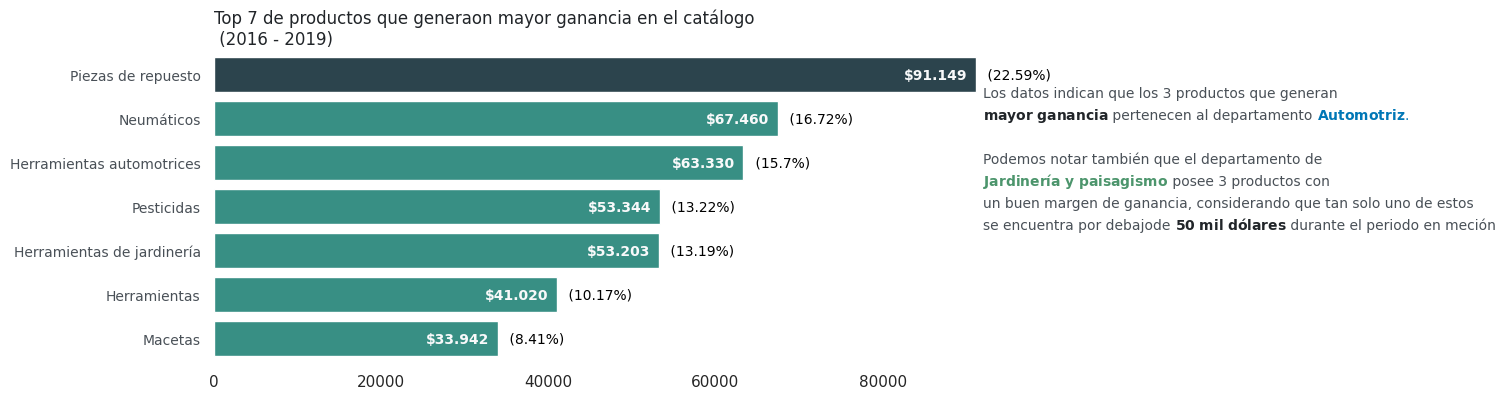

In [11]:
top_colrs = []
for prod in top_7.index:
  if top_7.loc[prod,'ganancia'] == top_7['ganancia'].max():
    top_colrs.append(VERDE3) # Color resaltado para el mayor valor
  else:
    top_colrs.append(VERDE2) # Color estándar para el resto


def grefico_colums_2(colore: list = top_colrs):
  # Creamos la figura y el eje con un tamaño personalizado
  fig, ax = plt.subplots(figsize = (40,4))
  fig.subplots_adjust(left = 0.7)
  # Establecemos un estilo blanco limpio
  sns.set_theme(style = 'white')

  # Creamos gráfico de barras con Seaborn, usando colores personalizados
  ax = sns.barplot(data = top_7, y = top_7.index, x= 'ganancia', palette = colore)

  # Título y configuración estética del gráfico
  ax.set_title('Top 7 de productos que generaon mayor ganancia en el catálogo\n (2016 - 2019)',
               loc='left', fontsize= 12, color = GRIS1)
  ax.set_xlabel('')       # Quitamos etiqueta del eje X
  ax.set_ylabel('')       # Quitamos etiqueta del eje Y
  ax.yaxis.set_tick_params(labelsize = 10, labelcolor = GRIS2)  # Tamaño y color de etiquetas del eje X
  sns.despine(left = True, bottom = True)

  #  Mostramos valores de cada barra de ellas
  for i, va in enumerate(top_7['ganancia']):
    ct = f'${va:,.0f}'.replace(',','.')   # Formateo como dinero
    offset = 1e3                          # Desplazamiento hacia arriba
    plt.text(va-offset, i, ct, ha = 'right',va = 'center',fontweight = 'bold', color = GRIS5, fontsize = 10)

  # Mostramos valores en porcentaje de cada barra de ellas
  for i, gana in enumerate(top_7['ganancia']):
    t = top_7['ganancia'].sum() #suma total del top 7
    porcentaje = round(gana / t * 100, 2) #Porcentaje del top 7
    ax.text(gana + max(top_7['ganancia']) * 0.01,  # posición x (un poco a la derecha)
            i,                                       # posición y (fila de la barra)
            f' ({porcentaje}%)',             # texto a mostrar
            va='center',
            fontsize=10,
            color='black')
  # Texto explicativo al lado derecho del gráfico

  return ax

#funcion para resaltar texto
def texto_destacado(x, y, texto, colores, esp=20, ax=None, **kw):
  # Invierte la lista de colores para que coincida con el orden del texto al graficar de abajo hacia arriba
    colores = list(reversed(colores))
    t = ax.transData
    canvas = ax.figure.canvas

    # Itera sobre las líneas del texto, desde la última hacia la primera
    for i, linea in enumerate(reversed(texto.split('\n'))):
        frases = linea.split('||')
        # Itera sobre los fragmentos y los colores correspondientes
        for s, cor in zip(frases, colores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

ax = grefico_colums_2()
# Llama a la función para mostrar el texto destacado y coloreado
texto_destacado(9.2e4, 3.5,
                'Los datos indican que los 3 productos que generan\n'
                '$\\bf{mayor\ ganancia}$|| pertenecen al departamento ||$\\bf{Automotriz}$.\n'
                '\n'
                'Podemos notar también que el departamento de\n'
                '$\\bf{Jardinería\ y\ paisagismo}$|| posee 3 productos con\n'
                'un buen margen de ganancia, considerando que tan solo uno de estos\n'
                'se encuentra por debajode ||$\\bf{50\ mil\ dólares}$|| durante el periodo en meción',
                # Lista de listas de colores para cada fragmento separado por '||' en cada línea
                [[GRIS2],
                 [GRIS1,GRIS2,AZUL2],
                 [GRIS2],
                 [GRIS2],
                 [VERDE1,GRIS2],
                 [GRIS2],
                 [GRIS2,GRIS1,GRIS2]
                 ],
                esp = 22,
                ax = ax,
                fontsize = 10)
fig = ax.get_figure()

### **Pregunta 3 -** Si dividimos el total de ventas por año por regiones, ¿qué podemos observar en nuestros datos?

In [12]:
df_ventas_reg = ventas.copy() # Copiamos el DataFrame original
df_ventas_reg = df_ventas_reg[['fecha_pedido','region','ventas',]] # Nos quedamos solo con fecha, región y ventas
df_ventas_reg['ano'] = df_ventas_reg['fecha_pedido'].dt.year # Extraemos el año de la fecha

df_ventas_reg.drop(labels= 'fecha_pedido', axis = 1, inplace=True)

df_ventas_reg = pd.crosstab(index = df_ventas_reg.ano, columns=df_ventas_reg.region, values=df_ventas_reg.ventas,aggfunc='sum') # Creamos una tabla que suma las ventas por año y región

# Ordenamos las columnas por región
df_ventas_reg = df_ventas_reg[['Buenos Aires', 'Litoral', 'Norte', 'Central', 'Cuyo', 'Patagónica']]
df_ventas_reg

region,Buenos Aires,Litoral,Norte,Central,Cuyo,Patagónica
ano,,,,,,
2016,447482.40,258650.64,251356.27,205928.22,174593.67,64641.13
2017,505005.01,289808.32,244946.54,228930.68,109446.32,111042.65
2018,654104.73,363684.46,296360.73,303706.58,200999.46,65305.45
2019,775187.16,449715.97,436180.40,324369.09,198213.80,121339.87


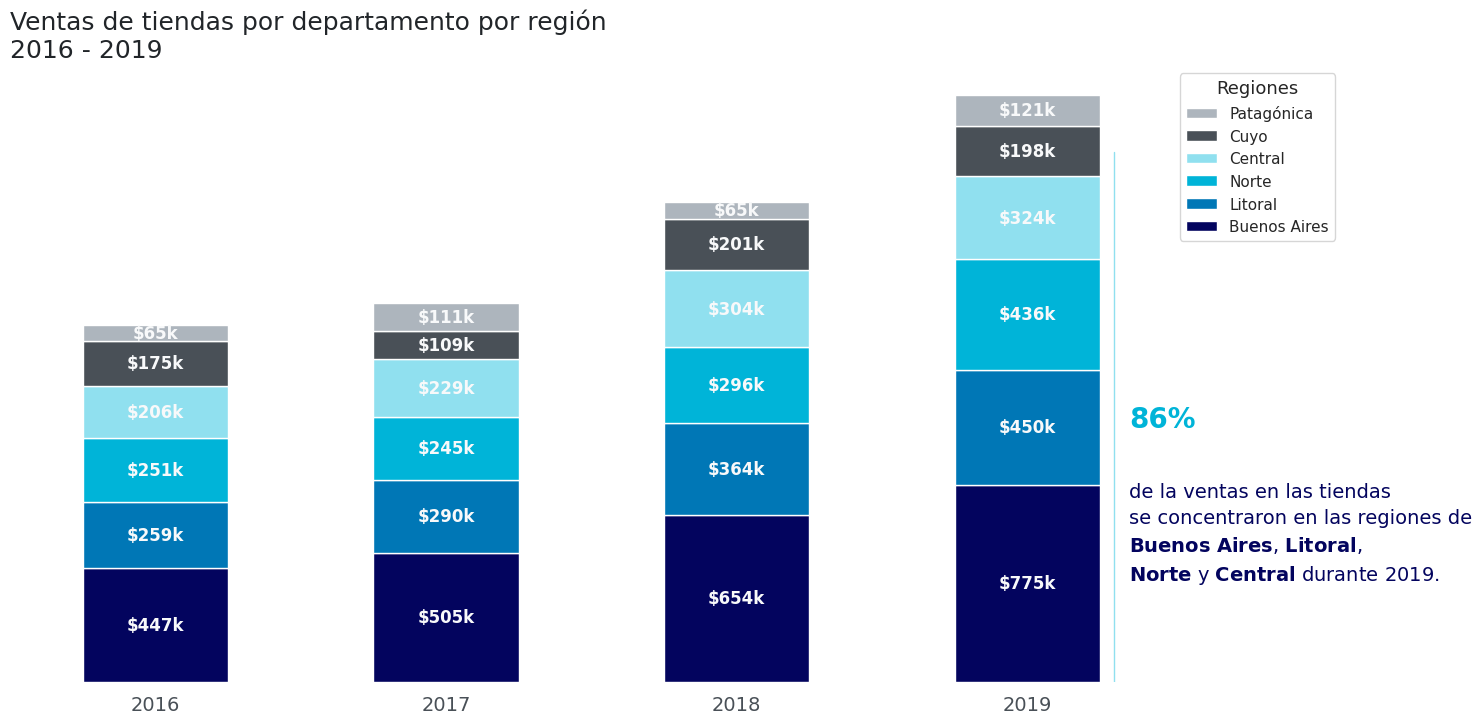

In [13]:
def grafico_region():
    # Colores para las regiones (uno por cada región en el orden del DataFrame)
    colores = [AZUL1, AZUL2, AZUL3, AZUL4, GRIS2, GRIS3]

    # Crear gráfico de barras apiladas
    ax = df_ventas_reg.plot(kind='bar', stacked=True, figsize=(15, 8), color=colores)

    # Título del gráfico
    ax.set_title('Ventas de tiendas por departamento por región\n2016 - 2019',
                 loc='left', fontsize=18, color=GRIS1)

    # Ocultamos etiquetas y ejes innecesarios
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_yticklabels([])

    # Estilo de las etiquetas del eje X
    ax.xaxis.set_tick_params(labelsize=14, labelcolor=GRIS2, rotation=0)

    # Quitamos el borde del gráfico
    ax.set_frame_on(False)

    # Texto grande: 86%
    ax.text(3.35, 1e6, '86%', fontweight='bold', fontsize=20, color=AZUL3)

    # Texto explicativo al lado derecho
    ax.text(3.35, 4e5,
            'de la ventas en las tiendas\n'
            'se concentraron en las regiones de\n'
            '$\\bf{Buenos\ Aires}$, $\\bf{Litoral}$, \n'
            '$\\bf{Norte}$ y $\\bf{Central}$ durante 2019.',
            fontsize=14,
            linespacing=1.45,
            color=AZUL1)

    # Leyenda de regiones, fuera del gráfico, orden inverso
    ax.legend(bbox_to_anchor=(1, 1), title='Regiones',
              reverse=True, fontsize=11, title_fontsize=13)

    # Mostrar etiquetas dentro de cada barra con valores en miles (k)
    for container in ax.containers:
        labels = [f'${valor.get_height()/1000:,.0f}k'.replace(',', '.') for valor in container]
        ax.bar_label(container, color=GRIS5, label_type='center',
                     labels=labels, fontweight='bold')

    # Línea vertical indicando la proporción de 86% en 2019
    ax.axvline(3.3, ymin=0.0, ymax=0.86, color=AZUL4, linewidth=1)

    return ax

# Ejecutamos la función y obtenemos el objeto figura desde el eje
ax = grafico_region()
fig = ax.get_figure()


<font color=green size=4> Conclusiones: </font>

---

Las regiones de Buenos Aires, Litoral, Norte y Central concentraron el 86% de las ventas en 2019, mostrando una clara tendencia de crecimiento sostenido, especialmente en Buenos Aires, que lidera cada año en volumen de ventas. Las demás regiones, como Cuyo y Patagónica, mantuvieron una participación significativamente menor y estable en todo el periodo

### **Pergunta 4 -** ¿Cuál es el método de envío más utilizado por los clientes de la tienda? ¿Es proporcional para B2B y B2C?

In [14]:
# Copia del DataFrame con solo columnas necesarias
df_envio = ventas.copy()
df_envio = df_envio[['modo_envio', 'segmento_cliente']]

# Tabla cruzada de envíos por segmento, ordenada por B2B
df_envio_sega = pd.crosstab(df_envio.modo_envio, df_envio.segmento_cliente).sort_values('B2B')

df_envio_sega

segmento_cliente,B2B,B2C
modo_envio,,
Entrega en 24 horas,207,288
Envío rápido,676,673
Económica,829,906
Entrega estándar,2552,2809


In [15]:
# Tabla cruzada de envíos por segmento, ordenada por B2B
df_envio_normalizado = pd.crosstab(index = df_envio.modo_envio, columns=df_envio.segmento_cliente, normalize= 'index').sort_values('B2B')

df_envio_normalizado

segmento_cliente,B2B,B2C
modo_envio,,
Entrega en 24 horas,0.418182,0.581818
Entrega estándar,0.476031,0.523969
Económica,0.477810,0.522190
Envío rápido,0.501112,0.498888


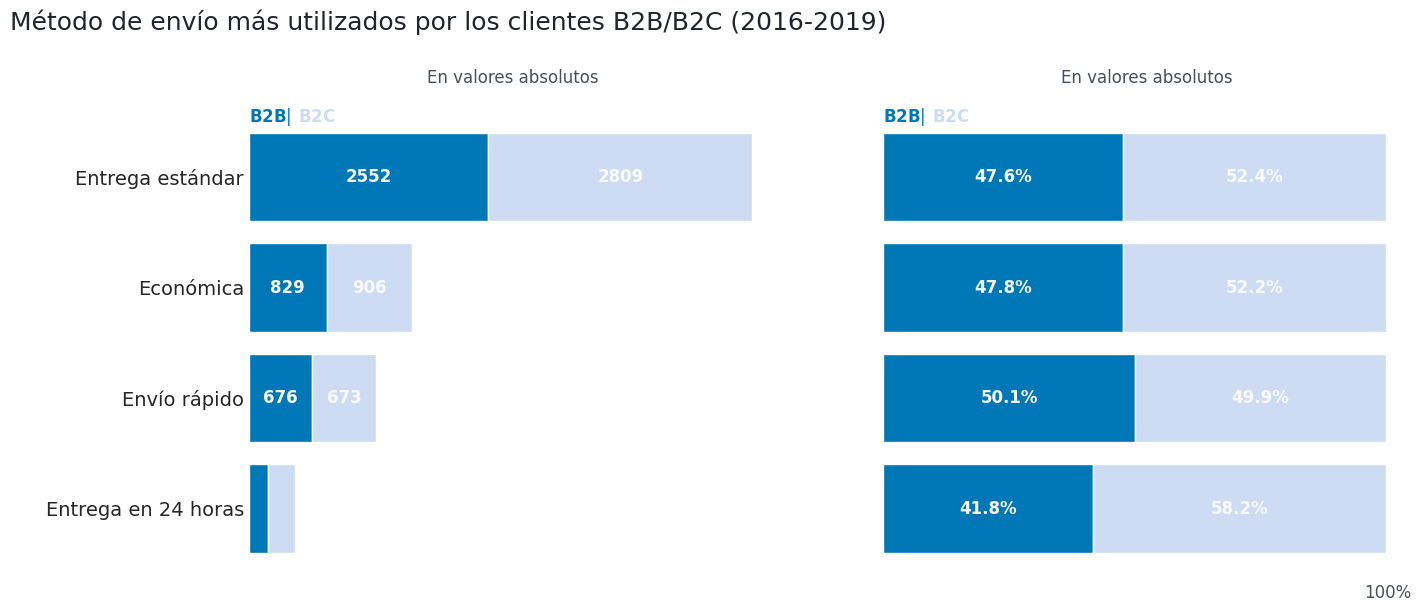

In [16]:
def b2b_b2c():
    # Colores para B2B y B2C
    colores = [AZUL2, AZUL5]

    # Crear figura con dos subgráficos horizontales compartiendo el eje Y
    fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

    # Gráfico 1: Barras horizontales en valores absolutos
    ax[0].barh(df_envio_sega.index, df_envio_sega['B2B'], color=colores[0])
    ax[0].barh(df_envio_sega.index, df_envio_sega['B2C'],
               left=df_envio_sega['B2B'], color=colores[1])

    # Configuración del primer gráfico
    ax[0].set_title('En valores absolutos\n', color=GRIS2)
    ax[0].set_xlabel('')
    ax[0].set_ylabel('')
    ax[0].set_xticklabels([])
    ax[0].yaxis.set_tick_params(labelsize=14, color=GRIS2)
    ax[0].set_frame_on(False)
    ax[0].tick_params(axis='both', which='both', length=0)  # Sin ticks
    texto_destacado(0, 3.5, '$\\bf{B2B}$| || $\\bf{B2C}$',
                    colores=[colores], ax=ax[0], fontsize=12)

    # Gráfico 2: Barras horizontales 100% apiladas (valores normalizados)
    ax[1].barh(df_envio_normalizado.index, df_envio_normalizado['B2B'], color=colores[0])
    ax[1].barh(df_envio_normalizado.index, df_envio_normalizado['B2C'],
               left=df_envio_normalizado['B2B'], color=colores[1])

    # Configuración del segundo gráfico
    ax[1].set_title('En valores absolutos\n', color=GRIS2)
    ax[1].set_xlabel('100%', color=GRIS2, fontsize=12, loc='right')
    ax[1].set_ylabel('')
    ax[1].set_xticklabels([])
    ax[1].xaxis.set_tick_params(labelsize=14, labelcolor=GRIS2)
    ax[1].set_frame_on(False)
    ax[1].tick_params(axis='both', which='both', length=0)  # Sin ticks
    texto_destacado(0, 3.5, '$\\bf{B2B}$| || $\\bf{B2C}$',
                    colores=[colores], ax=ax[1], fontsize=12)

    # Título general del gráfico
    fig.suptitle('Método de envío más utilizados por los clientes B2B/B2C (2016-2019)\n',
                 fontsize=18, color=GRIS1, ha='right', x=0.55, y=1.05)

    # Etiquetas dentro de las barras del primer gráfico (solo si valor > 300)
    for container in ax[0].containers:
        labels = [f'{valor.get_width()*1:}' if valor.get_width() > 300 else ''
                  for valor in container]
        ax[0].bar_label(container, label_type='center',
                        labels=labels, size=12, color=GRIS5, fontweight='bold')

    # Etiquetas en % para el segundo gráfico
    for container in ax[1].containers:
        labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
        ax[1].bar_label(container, label_type='center',
                        labels=labels, size=12, color=GRIS5, fontweight='bold')

    return fig, ax

# Ejecutar la función y generar el gráfico
fig, ax = b2b_b2c()



<font color=green size=4> Conclusiones: </font>

---
La entrega estándar es el método de envío más utilizado tanto por clientes B2B como B2C entre 2016 y 2019, mientras que la "Entrega en 24 horas" es la menos frecuente y preferida mayormente por clientes B2C. En general, las preferencias de ambos segmentos son similares, con ligeras diferencias en proporción.


### **Pregunta 5 -** ¿Cuál es el total de ventas por trimestre en la provincia de Buenos Aires?

In [17]:

df_bsas = ventas.copy()# Copiamos el DataFrame original

# Filtramos solo las ventas de la provincia de Buenos Aires y seleccionamos columnas relevantes
df_bsas = df_bsas.query('provincia == "Buenos Aires"')[['fecha_pedido', 'ventas']]

df_bsas.set_index('fecha_pedido', inplace=True)# Ponemos la fecha como índice
df_bsas = df_bsas.resample('Q').agg('sum')# Agrupamos las ventas por trimestre (resampleo trimestral)
df_bsas.ventas = round(df_bsas.ventas / 1000, 2)# Convertimos las ventas a miles y redondeamos a 2 decimales
df_bsas = df_bsas.reset_index()# Restauramos el índice (la fecha vuelve a ser columna)

# Renombramos la columna para indicar que está en miles
df_bsas.rename(columns={'ventas': 'ventas-k'}, inplace=True)

df_bsas


,fecha_pedido,ventas-k
0,2016-03-31,41.87
1,2016-06-30,43.79
2,2016-09-30,154.91
3,2016-12-31,144.82
4,2017-03-31,36.13
5,2017-06-30,76.86
6,2017-09-30,129.76
7,2017-12-31,197.94
8,2018-03-31,44.26
9,2018-06-30,109.64


In [18]:
import plotly.express as px

In [19]:
def grafico_bsas():
  # Gráfico de línea con marcadores para ventas trimestrales en Buenos Aires
  fig = px.line(
      df_bsas,
      x='fecha_pedido',
      y='ventas-k',
      labels={'region': 'Región'},
      markers=True,
      color_discrete_sequence=[AZUL2]  # Color de la línea
  )

  # Personalización del layout del gráfico
  fig.update_layout(
      width=1300,
      height=600,
      font_family='DejaVu Sans',
      font_size=15,
      title_font_size=24,
      font_color=GRIS2,
      title_font_color=AZUL1,
      title_text='Ventas por trimestre en cada de Buenos Aires' +
                 '<br><sup size=1 style="color:#e55655"> De 2016 a 2019',
      xaxis_title='',
      yaxis_title='',
      plot_bgcolor=GRIS4
  )

  # Formato del eje Y: prefijo "$", sufijo "K", separador de miles
  fig.update_yaxes(
      tickprefix='$ ',
      tickformat=',',
      ticksuffix='K'
  )

  # Etiquetas personalizadas para el eje X por trimestre
  labels = [
      'T1<br>2016', 'T2<br>2016', 'T3<br>2016', 'T4<br>2016',
      'T1<br>2017', 'T2<br>2017', 'T3<br>2017', 'T4<br>2017',
      'T1<br>2018', 'T2<br>2018', 'T3<br>2018', 'T4<br>2018',
      'T1<br>2019', 'T2<br>2019', 'T3<br>2019', 'T4<br>2019'
  ]
  fig.update_xaxes(ticktext=labels, tickvals=df_bsas.fecha_pedido)

  # Formato del texto flotante al pasar el mouse (tooltip)
  fig.update_traces(
      hovertemplate='<b>Período:</b> %{x}<br><b>Facturación:</b> %{y}'
  )

  # Personalización de la leyenda
  fig.update_layout(
      legend=dict(
          title="Título de leyenda",
          orientation="v",
          x=1.15,
          y=0.5,
          xanchor="right",
          yanchor="middle",
          bordercolor="black",
          borderwidth=2
      )
  )

  # Estilo del hover: letra más chica y unificada en eje X
  fig.update_layout(
      hoverlabel_font_size=12,
      hovermode='x unified'
  )

  return fig

# Mostrar gráfico
fig = grafico_bsas()
fig.show()


### **Pregunta 6 -** ¿Cuál es la facturación por trimestre en cada región?

In [20]:
df_region = ventas.copy()
# Seleccionamos solo las columnas necesarias
df_region = df_region[['region', 'fecha_pedido', 'ventas']]

# Creamos tabla cruzada: suma de ventas por fecha y región
df_region = pd.crosstab(
    index=df_region.fecha_pedido,
    columns=df_region.region,
    values=df_region.ventas,
    aggfunc='sum'
)

# Agrupamos por trimestres (resampleo trimestral) y sumamos las ventas
df_region = df_region.resample('Q').agg('sum')
df_region

region,Buenos Aires,Central,Cuyo,Litoral,Norte,Patagónica
fecha_pedido,,,,,,
2016-03-31,44125.73,12853.69,28721.92,29065.50,19428.11,5338.27
2016-06-30,61735.91,55586.01,40651.98,44686.75,51530.07,22058.12
2016-09-30,171807.49,30466.94,63587.34,78068.22,101860.74,12280.69
2016-12-31,169813.27,107021.58,41632.43,106830.17,78537.35,24964.05
2017-03-31,38299.84,62291.22,22494.95,25649.02,47634.58,39002.88
2017-06-30,88544.93,62140.59,22200.66,57220.59,32213.00,5692.42
2017-09-30,160784.96,35559.76,40671.39,81444.31,60703.69,37934.95
2017-12-31,217375.28,68939.11,24079.32,125494.40,104395.27,28412.40
2018-03-31,56123.51,62051.70,37844.72,76636.66,26784.10,28802.48


In [21]:
def grafico_region_tri():
    # Paleta de colores para cada región
    colores = [AZUL1, AZUL2, AZUL3, AZUL4, GRIS3, GRIS4]

    # Gráfico de líneas con marcadores, múltiples columnas como series
    fig = px.line(
        df_region,
        x=df_region.index,
        y=df_region.columns,
        labels={'region': 'Región'},
        markers=True,
        color_discrete_sequence=colores
    )

    # Personalización del layout general del gráfico
    fig.update_layout(
        width=1300,
        height=600,
        font_family='DejaVu Sans',
        font_size=15,
        title_font_size=24,
        font_color=GRIS2,
        title_font_color=AZUL1,
        title_text='Ventas por trimestre en cada región' +
                   '<br><sup size=1 style="color:#e55655"> De 2016 a 2019 ',
        xaxis_title='',
        yaxis_title='',
        plot_bgcolor=GRIS4
    )

    # Formato del eje Y: prefijo '$', separador de miles
    fig.update_yaxes(tickprefix='$ ', tickformat=',')

    # Etiquetas personalizadas del eje X por trimestres
    labels = [
        'T1<br>2016', 'T2<br>2016', 'T3<br>2016', 'T4<br>2016',
        'T1<br>2017', 'T2<br>2017', 'T3<br>2017', 'T4<br>2017',
        'T1<br>2018', 'T2<br>2018', 'T3<br>2018', 'T4<br>2018',
        'T1<br>2019', 'T2<br>2019', 'T3<br>2019', 'T4<br>2019'
    ]
    fig.update_xaxes(ticktext=labels, tickvals=df_region.index)

    # Formato de texto al pasar el mouse (tooltip)
    fig.update_traces(
        hovertemplate='<b>Período:</b> %{x}<br><b>Facturación:</b> %{y}'
    )

    # Configuración de la leyenda
    fig.update_layout(
        legend=dict(
            title="Título de leyenda",
            orientation="v",
            x=1.15,
            y=0.5,
            xanchor="right",
            yanchor="middle",
            bordercolor="black",
            borderwidth=2
        )
    )

    # Hover unificado y tamaño de fuente del tooltip
    fig.update_layout(
        hoverlabel_font_size=12,
        hovermode='x unified'
    )

    return fig

# Mostrar gráfico
fig = grafico_region_tri()
fig.show()


<font color=green size=4> Conclusiones: </font>

---

La región de Buenos Aires lidera consistentemente las ventas en todos los trimestres, con picos marcados especialmente a finales de cada año, mientras que otras regiones como Patagónica y Cuyo presentan niveles de venta considerablemente más bajos y estables.

# **Situación problema 2**

Una fábrica de productos de higiene y limpieza selecciona muestras de sus productos fabricados regularmente y documenta el volumen y las dimensiones de sus productos para que cumplan con los criterios de calidad. Como científico de datos, has recibido algunas muestras para analizar y describir algunas métricas (como la media y la mediana, por ejemplo) de las muestras utilizando gráficos para facilitar la comprensión de estos valores.

 trabajaremos con dos bases de datos, que son:
1. Volúmenes de un suavizante de 1 litro en un total de 1000 muestras medidas.
2. Medidas de altura, longitud y anchura de una caja de detergente en polvo en un total de 1000 muestras medidas.


#### **Base de datos 1 - Muestra de los volúmenes del suavizante**

In [ ]:
url_vol = 'https://raw.githubusercontent.com/C-Adrian-ST95/Ventas_Tiendas_Visualizacion_2016_2019/refs/heads/master/suavizante.csv'
df_volumen = pd.read_csv(url_vol)
df_volumen.head( )

,Volumen
0,999.8
1,999.5
2,999.7
3,999.1
4,999.8


Después de visualizar rápidamente los datos que tenemos, vamos a proceder con los análisis que podemos realizar con estos datos y qué gráficos de distribución vamos a utilizar para presentar este tipo de información.

### **Preguntas**

1. ¿Cómo están distribuidos los datos de los volúmenes de la muestra del suavizante? ¿Cuál sería su valor central (promedio y mediana)?

2. ¿Cómo están distribuidos los datos de los volúmenes del suavizante según la mediana y los cuartiles? ¿Existen datos atípicos?


### **Pregunta 1 -** ¿Cómo están distribuidos los datos de los volúmenes de la muestra del suavizante? ¿Cuál sería su valor central (promedio y mediana)?

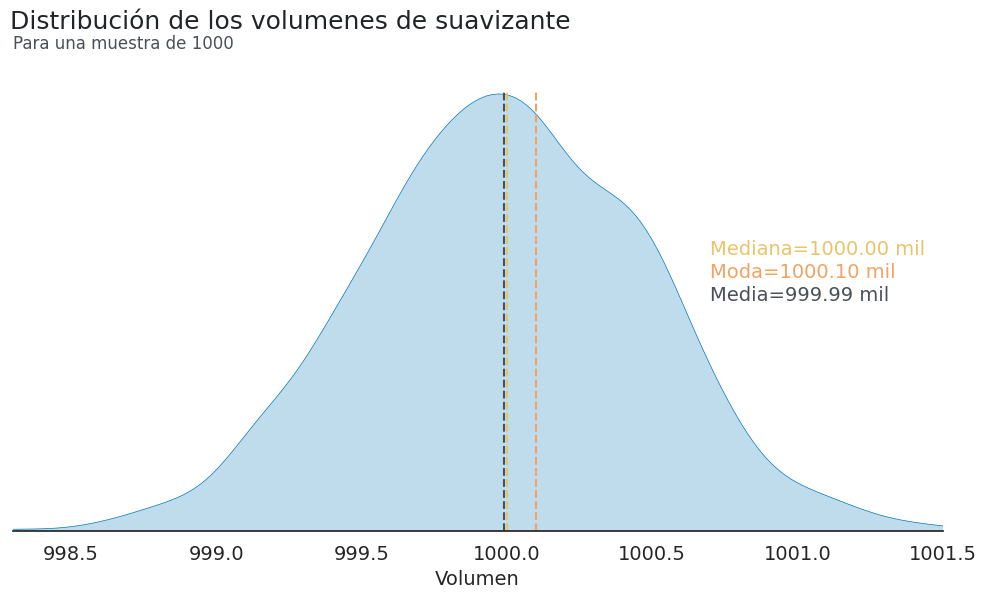

In [42]:
def grafico_densidad():
    # Crear figura y eje
    fig, ax = plt.subplots(figsize=(12, 6))

    # Gráfico de densidad con KDE (curva suavizada)
    fig = sns.kdeplot(
        data=df_volumen,
        x='Volumen',
        color=AZUL2,
        fill=True,    # Rellena el área bajo la curva
        lw=0.5        # Grosor del borde de la curva
    )

    # Título principal y subtítulo
    plt.suptitle('Distribución de los volumenes de suavizante',
                 size=18, color=GRIS1, ha='right', y=0.98, x=0.59)
    plt.title('Para una muestra de 1000',
              fontsize=12, loc='left', pad=15, color=GRIS2)

    # Etiquetas de los ejes
    ax.set_xlabel('Volumen', fontsize=14)
    ax.set_ylabel('Cantidad', fontsize=14)

    # Estilo de los ticks de los ejes
    ax.yaxis.set_tick_params(labelsize=14, color=GRIS2)
    ax.xaxis.set_tick_params(labelsize=14, color=GRIS2)

    # Limita el eje X al rango de los datos
    ax.set_xlim(df_volumen.Volumen.min(), df_volumen.Volumen.max())

    # Oculta la etiqueta y los valores del eje Y (estética minimalista)
    ax.set_ylabel('')
    ax.set_yticklabels([])

    # Calcula estadísticas: mediana, moda y media del volumen
    estac = (
        df_volumen.Volumen.median(),
        df_volumen.Volumen.mode()[0],
        df_volumen.Volumen.mean()
    )

    # Nombres y colores para cada estadístico
    desc = ['Mediana', 'Moda', 'Media']
    colors = [AMARILLO1, ANARANJADO1, GRIS2]

    # Agrega líneas verticales para los valores estadísticos
    ax.vlines(
        x=estac,
        ymax=0.8, ymin=0,
        colors=colors,
        linestyles='--'
    )

    # Agrega texto con los valores de cada estadístico dentro del gráfico
    for estados in range(len(estac)):
        ax.text(
            0.75,                        # Posición horizontal relativa (en %)
            (0.6 - estados / 20),        # Posición vertical relativa
            f'{desc[estados]}={estac[estados]:.2f} mil',
            fontsize=14,
            color=colors[estados],
            transform=ax.transAxes       # Usa coordenadas relativas al eje
        )

    # Quita las líneas de borde del eje izquierdo
    sns.despine(left=True)

    return ax

# Ejecuta la función y obtiene la figura
ax = grafico_densidad()
fig = ax.get_figure()



<font color=green size=4> Conclusiones: </font>

---

El gráfico de densidad (histograma de línea) es ideal para muchas observaciones.
 podemos observar una distribución normal, con una ligera asimetría hacia la izquierda (mediana > promedio). La moda también está presente en el gráfico. Estas 3 medidas de tendencia central son importantes para la estadística descriptiva de los datos y ayudan en la construcción de modelos y análisis de los datos.

### **Pregunta 2 -** ¿Cómo están distribuidos los datos de los volúmenes del suavizante según la mediana y los cuartiles? ¿Existen datos atípicos?

In [32]:
import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse

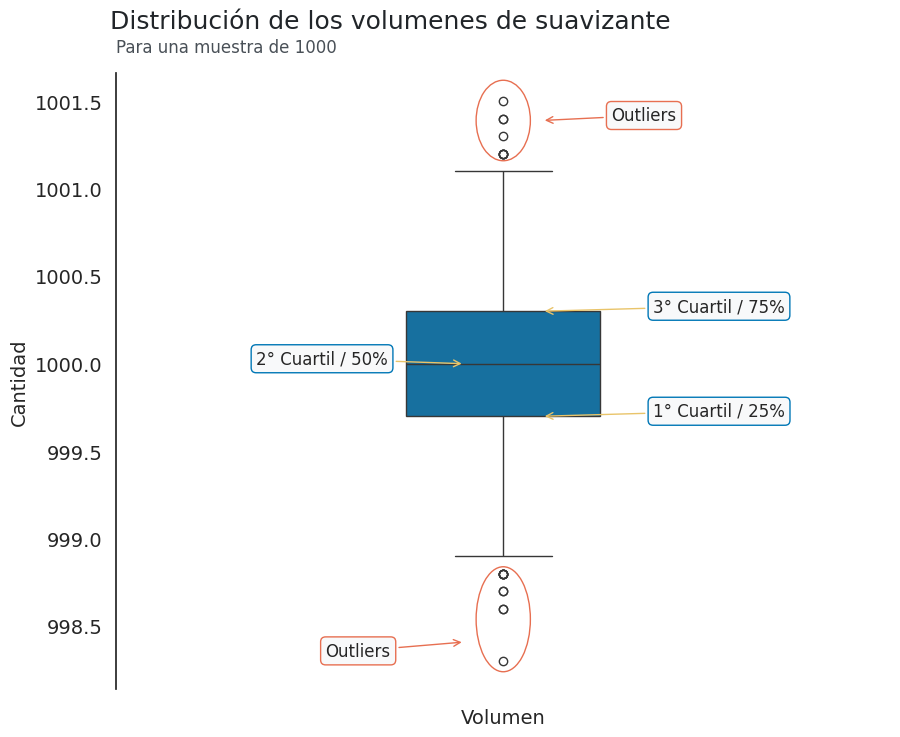

In [44]:
def grafico_cuart():
    # Crear figura y eje
    fig, ax = plt.subplots(figsize=(10, 8))

    # Gráfico de caja (boxplot) vertical para la columna 'Volumen'
    fig = sns.boxplot(data=df_volumen, y=df_volumen.Volumen, color=AZUL2, width=0.25)

    # Títulos
    plt.suptitle('Distribución de los volumenes de suavizante', size=18, color=GRIS1, ha='right', y=0.96, x=0.68)
    plt.title('Para una muestra de 1000', fontsize=12, loc='left', pad=15, color=GRIS2)

    # Etiquetas y estilo de ejes
    ax.set_xlabel('Volumen', fontsize=14)
    ax.set_ylabel('Cantidad', fontsize=14)
    ax.yaxis.set_tick_params(labelsize=14, color=GRIS2)
    ax.xaxis.set_tick_params(labelsize=14, color=GRIS2)
    sns.despine(bottom=True)

    # Coordenadas para outliers
    ymin, ymax = ax.get_ybound()
    outlier_sup = Ellipse((0, ymax - 0.27), width=0.07, height=0.46, color=ROJO1, fill=False)
    outlier_inf = Ellipse((0, ymin + 0.4), width=0.07, height=0.6, color=ROJO1, fill=False)

    # Dibujar outliers
    ax.add_artist(outlier_sup)
    ax.add_artist(outlier_inf)

    # Anotar outliers y cuartiles
    ax.annotate("Outliers", xy=(0.05, ymax - 0.27), xytext=(50, 0), textcoords='offset points',
                bbox=dict(boxstyle="round", fc=GRIS5, ec=ROJO1), arrowprops=dict(arrowstyle="->", color=ROJO1))

    ax.annotate("Outliers", xy=(-0.05, ymin + 0.27), xytext=(-100, -10), textcoords='offset points',
                bbox=dict(boxstyle="round", fc=GRIS5, ec=ROJO1), arrowprops=dict(arrowstyle="->", color=ROJO1))

    ax.annotate("1° Cuartil / 25%", xy=(0.05, df_volumen.quantile(.25)), xytext=(80, 0), textcoords='offset points',
                bbox=dict(boxstyle="round", fc=GRIS5, ec=AZUL2), arrowprops=dict(arrowstyle="->", color=AMARILLO1))

    ax.annotate("2° Cuartil / 50%", xy=(-0.05, df_volumen.quantile(.50)), xytext=(-150, 0), textcoords='offset points',
                bbox=dict(boxstyle="round", fc=GRIS5, ec=AZUL2), arrowprops=dict(arrowstyle="->", color=AMARILLO1))

    ax.annotate("3° Cuartil / 75%", xy=(0.05, df_volumen.quantile(.75)), xytext=(80, 0), textcoords='offset points',
                bbox=dict(boxstyle="round", fc=GRIS5, ec=AZUL2), arrowprops=dict(arrowstyle="->", color=AMARILLO1))

    return ax

# Mostrar gráfico
ax = grafico_cuart()
fig = ax.get_figure()


<font color=green size=4> Conclusiones: </font>

---

El gráfico de caja (boxplot) es ideal para representar un conjunto de datos según 5 medidas de interés: el valor máximo, mínimo, el primer cuartil (donde se sitúan el primer 25% de los datos), el segundo cuartil o mediana (donde se sitúa el 50% de los datos) y el tercer cuartil (donde se sitúa el 75% de los datos).

También están los valores atípicos (outliers) que son considerados puntos discrepantes, es decir, valores que están alejados del patrón de los datos.

In [ ]:
df_caja = pd.read_csv('https://raw.githubusercontent.com/C-Adrian-ST95/Ventas_Tiendas_Visualizacion_2016_2019/refs/heads/master/cajas_detergente.csv')
df_caja

,longitud,altura,profundidad,muestra
0,20.11,14.89,4.95,A
1,20.13,14.86,5.06,A
2,19.99,15.01,4.97,A
3,20.06,14.93,4.94,A
4,19.99,15.01,5.09,A
...,...,...,...,...
995,20.08,14.92,4.97,E
996,20.13,14.86,5.00,E
997,20.00,15.00,5.06,E
998,20.04,14.96,5.10,E


Después de echar un vistazo rápido a los datos que tenemos, pasaremos a analizar qué tipo de análisis podemos realizar con estos datos y qué gráficos de distribución vamos a utilizar para presentar esta información.

### **Preguntas**

3. ¿Cómo está distribuida la longitud de las cajas de detergente en polvo para cada una de las muestras?

4. ¿Cómo están dispuestas las medidas de longitud y altura de la muestra A? Si queremos rechazar todos los artículos en los que el valor de longitud y altura esté un 1% por encima o por debajo de los valores de 20 y 15 respectivamente, ¿cuáles serían rechazados?



### **Pregunta 3 -** ¿Cómo está distribuida la longitud de las cajas de detergente en polvo para cada una de las muestras?

In [26]:
import matplotlib.patches as mpatches

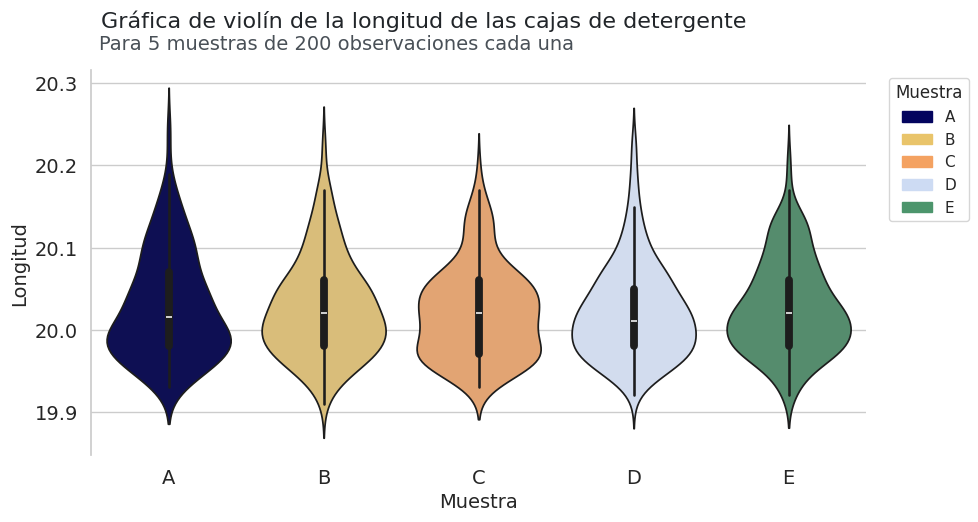

In [49]:
def grafico_caja():
    # Crear figura y eje
  fig, ax = plt.subplots(figsize=(10,5))
  sns.set_theme(style='whitegrid')

  # Gráfico de violín para la variable 'longitud' por muestra
  ax = sns.violinplot(data = df_caja,
                      x = 'muestra',
                      y = 'longitud',
                      palette=[AZUL1,AMARILLO1,ANARANJADO1,AZUL5,VERDE1,GRIS3])

  # Título principal y subtítulo
  plt.suptitle('Gráfica de violín de la longitud de las cajas de detergente',
               size= 16, color = GRIS1,ha = 'right', va = 'center', x = 0.78,y= 0.98)

  plt.title('Para 5 muestras de 200 observaciones cada una',
            fontsize = 14, color= GRIS2,pad=15,loc='left', x =   0.01)

  # Etiquetas de los ejes
  ax.set_xlabel('Muestra', fontsize = 14)
  ax.set_ylabel('Longitud', fontsize = 14)

  # Estilo de los ticks
  ax.xaxis.set_tick_params(labelsize = 14, color=GRIS2)
  ax.yaxis.set_tick_params(labelsize = 14, color=GRIS2)

  # Leyenda personalizada para cada color de muestra
  colores = [AZUL1, AMARILLO1, ANARANJADO1, AZUL5, VERDE1, GRIS3]
  etiquetas =['A', 'B', 'C', 'D', 'E']
  handles = [mpatches.Patch(color=c, label=l) for c, l in zip(colores, etiquetas)]

  # Eliminar borde inferior
  sns.despine(bottom = True)
  # Agregar la leyenda al gráfico
  ax.legend(handles=handles, title='Muestra', loc='upper left', bbox_to_anchor=(1.02, 1))

  return ax
ax = grafico_caja()
fig = ax.get_figure()

<font color=green size=4> Conclusiones: </font>

---

El gráfico de violín es una combinación entre el histograma y el boxplot. En él, podemos observar tanto la distribución de los datos mediante la representación de la curva, como dentro de él percibimos el boxplot con las variables de interés.

Como sugerencia, también podemos probar esta técnica con otros valores en nuestra base de datos, como por ejemplo, la profundidad o la altura de la caja. Vale la pena probar si tenemos una gran diferencia entre las muestras y lo que podemos observar en esta distribución.

### **Pregunta 4 -** ¿Cómo están dispuestas las medidas de longitud y altura de la muestra A? Si queremos rechazar todos los artículos en los que el valor de longitud y altura esté un 1% por encima o por debajo de los valores de 20 y 15 respectivamente, ¿cuáles serían rechazados?

In [28]:
df_a = df_caja.query('muestra == "A"')[['longitud','altura']]
df_a

,longitud,altura
0,20.11,14.89
1,20.13,14.86
2,19.99,15.01
3,20.06,14.93
4,19.99,15.01
...,...,...
195,19.98,15.02
196,19.99,15.01
197,20.00,15.00
198,20.00,15.00


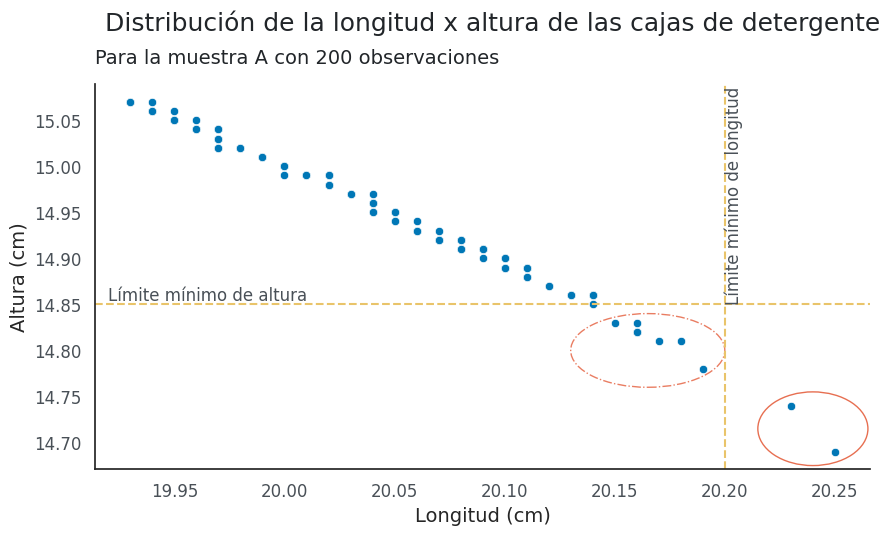

In [54]:
# Colores para clasificar observaciones: rojo (longitud fuera), amarillo (altura fuera), azul (aceptadas)
colores = [ROJO1, AMARILLO1, AZUL1]

# Tolerancia del 1%
pct = 0.01

# Cajas que no cumplen con los límites de longitud (±1% de 20 cm)
rechaza_long = [True if (l > 20*(1+pct) or l < 20*(1-pct)) else False for l in df_a['longitud']]

# Cajas que no cumplen con los límites de altura (±1% de 15 cm)
rechaza_alt = [True if (a > 15*(1+pct) or a < 15*(1-pct)) else False for a in df_a['altura']]

# Asignar color según el tipo de rechazo
map_color = np.where(rechaza_long, colores[0], np.where(rechaza_alt, colores[1], colores[2]))

# Función para graficar dispersión
def grafico_dispersion(map_color: list = AZUL2, toc: float = 0.01):
    # Crear figura
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.set_theme(style='white')

    # Gráfico de dispersión de longitud vs altura
    ax = sns.scatterplot(data=df_a, x='longitud', y='altura', color=map_color)

    # Títulos del gráfico
    plt.suptitle('Distribución de la longitud x altura de las cajas de detergente',
                 size=18, color=GRIS1, ha='right', x=0.91, y=1.03)
    plt.title('Para la muestra A con 200 observaciones',
              fontsize=14, color=GRIS1, pad=15, loc='left')

    # Etiquetas de ejes
    ax.set_xlabel('Longitud (cm)', fontsize=14)
    ax.set_ylabel('Altura (cm)', fontsize=14)

    # Estilo de ticks
    ax.xaxis.set_tick_params(labelsize=12, labelcolor=GRIS2)
    ax.yaxis.set_tick_params(labelsize=12, labelcolor=GRIS2)

    # Quitar bordes
    sns.despine()

    # Límites de tolerancia: línea horizontal y vertical
    ax.text(19.92, 15*(1 - toc), 'Límite mínimo de altura', fontsize=12, color=GRIS2, va='bottom')
    ax.axhline(y=15*(1 - toc), ls='--', color=AMARILLO1)

    ax.text(20*(1 + toc), 15*(1 - toc), 'Límite mínimo de longitud',
            fontsize=12, color=GRIS2, va='bottom', rotation='vertical')
    ax.axvline(x=20*(1 + toc), ls='--', color=AMARILLO1)

    # Elipses para resaltar dos cajas rechazadas (una por longitud, otra por altura)
    recha_long = Ellipse((20.165, 14.80), width=0.07, height=0.08,
                         color=ROJO1, fill=False, alpha=0.9, ls='-.')
    recha_alt = Ellipse((20.24, 14.715), width=0.05, height=0.08,
                        color=ROJO1, fill=False)

    ax.add_patch(recha_long)
    ax.add_patch(recha_alt)

    return ax

# Ejecutar función
ax = grafico_dispersion()


<font color=green size=4> Conclusiones: </font>

---
También utilizado para la relación entre los datos, este gráfico de distribución muestra cómo están distribuidas las dimensiones de las cajas entre dos variables: longitud y altura.

Aquí utilizamos dos recursos visuales, el de zoom (generado por la delimitación de los límites máximos y mínimos de longitud y altura, respectivamente) y el de similitud a través de los colores, representando los grupos de valores aceptados, rechazados por altura y rechazados por altura y longitud.